In [3]:
bitstring = '10101100'

In [4]:
n = len(bitstring)

In [5]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
q = QuantumRegister(n+1)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)

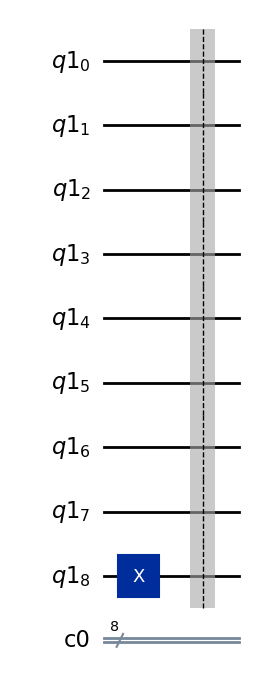

In [6]:
qc.x(q[n])
qc.barrier()
qc.draw('mpl')

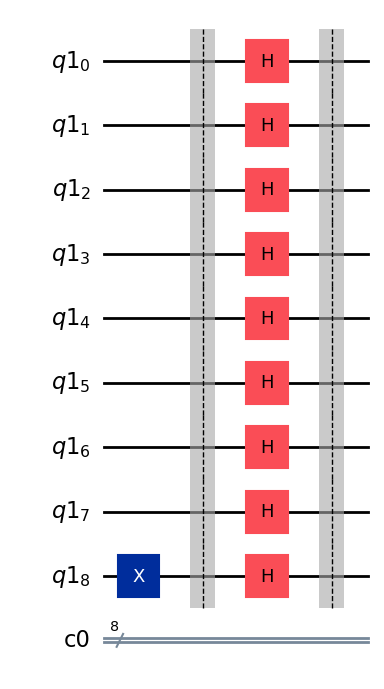

In [7]:
for i in range(n+1):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

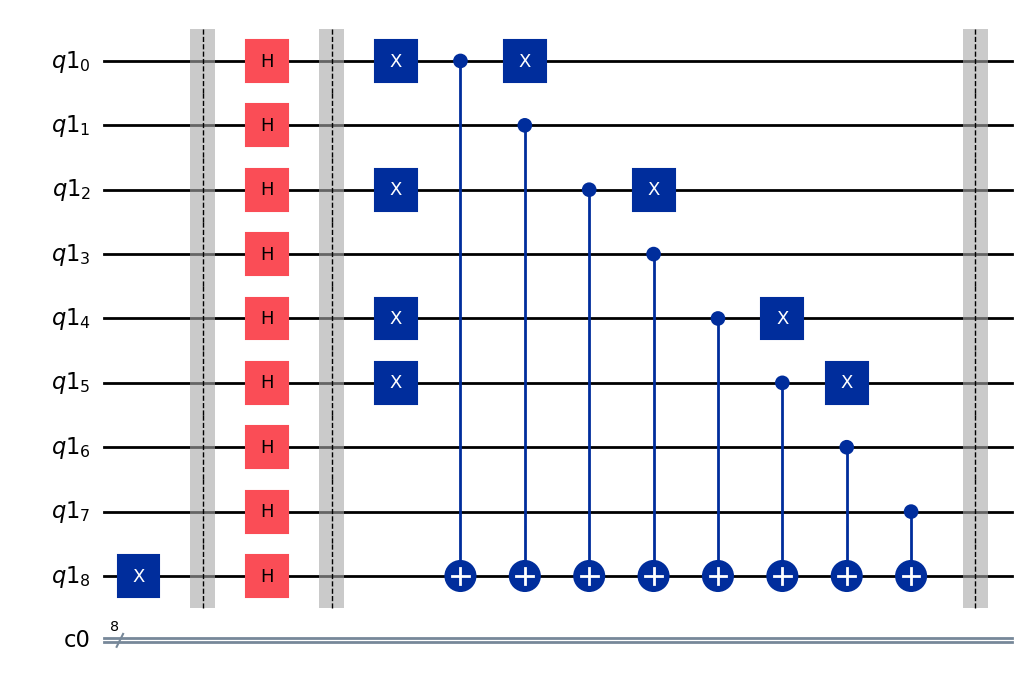

In [8]:
function = 'Balanced'
if function == 'Balanced':
    for i in range(n):
        if bitstring[i]=='1':
            qc.x(q[i])
        qc.cx(q[i],q[n])
        if bitstring[i]=='1':
            qc.x(q[i])
elif function=='Constant':
    qc.i(q[n])
qc.barrier()
qc.draw('mpl')

## **Function**

The first step is to check whether the function is **balanced** or **constant**. In this case, we assume the function is balanced, as indicated by the bitstring `'10101100'`.

```python
function = 'Balanced'
if function == 'Balanced':
```

This block of code applies the quantum operations corresponding to the balanced function.

```python
for i in range(n):
    if bitstring[i] == '1':
        qc.x(q[i])
    qc.cx(q[i], q[n])
    if bitstring[i] == '1':
        qc.x(q[i])

```
- The loop iterates over the input qubits (the first \( n \) qubits).
- For each bit in the bitstring:
  - If the bit is '1' (as per the bitstring), an **X gate** is applied to the corresponding qubit (`qc.x(q[i])`).
  - **CX Gate**: The **CNOT (CX)** gate is applied between the \( i \)-th qubit and the auxiliary qubit \( q[n] \) (which is the final qubit). This step is essential for creating the **quantum superposition** and incorporating the oracle.
  - After the CNOT gate, if the bitstring has a '1' at the current index, the **X gate** is undone (since you applied it at the start) to return the qubit to its original state.



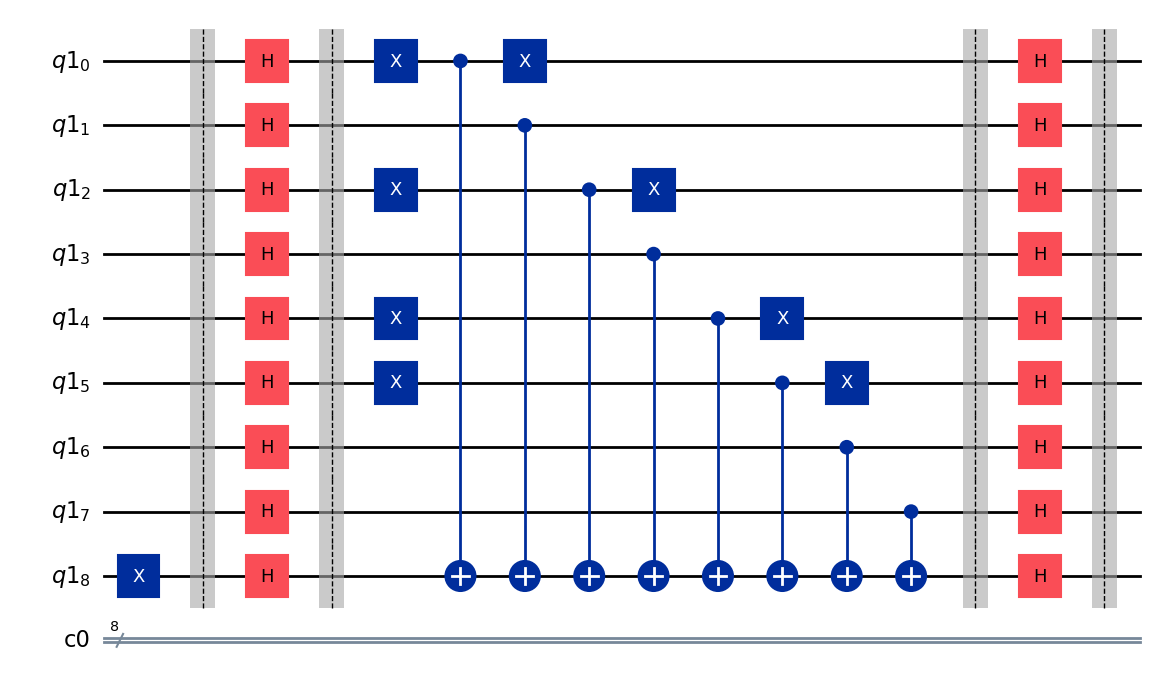

In [9]:
for i in range(n+1):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')

### Apply Hadamard Gates to All Qubits

```python
for i in range(n+1):
    qc.h(q[i])
qc.barrier()
qc.draw('mpl')
```

The loop iterates over all the qubits, from \( 0 \) to \( n \), applying a **Hadamard gate (H)** to each qubit (`qc.h(q[i])`).
- The **Hadamard gate** creates a **superposition** of the qubit states, meaning each qubit will be in an equal superposition of \( |0> \) and \( |1> \) before any measurements are made.


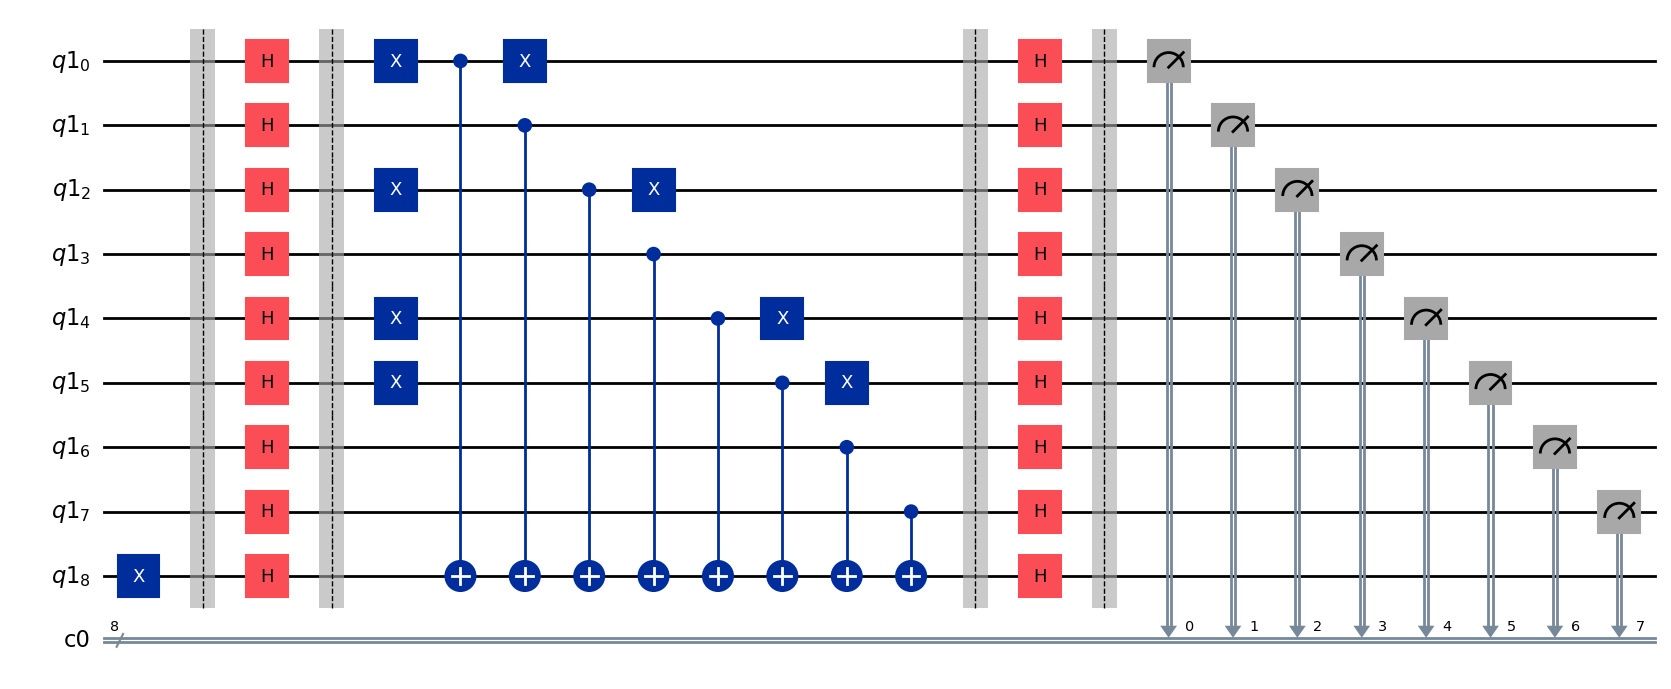

In [10]:
for i in range(n):
    qc.measure(q[i],c[i])
qc.draw('mpl')

{'11111111': 1024}


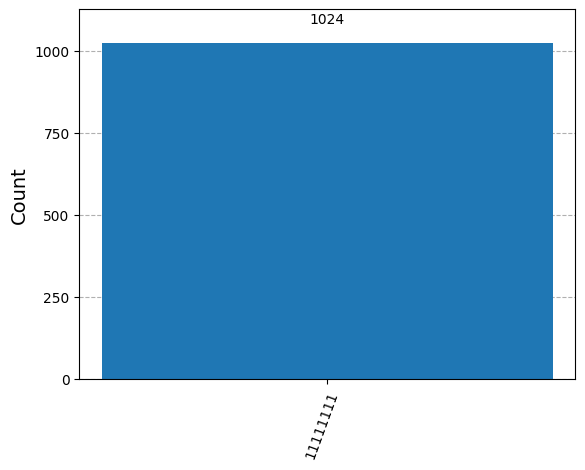

In [11]:
from qiskit import transpile
from qiskit_aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [12]:
from qiskit_ibm_runtime.fake_provider import FakeGuadalupeV2

In [13]:
device_simulation= FakeGuadalupeV2()

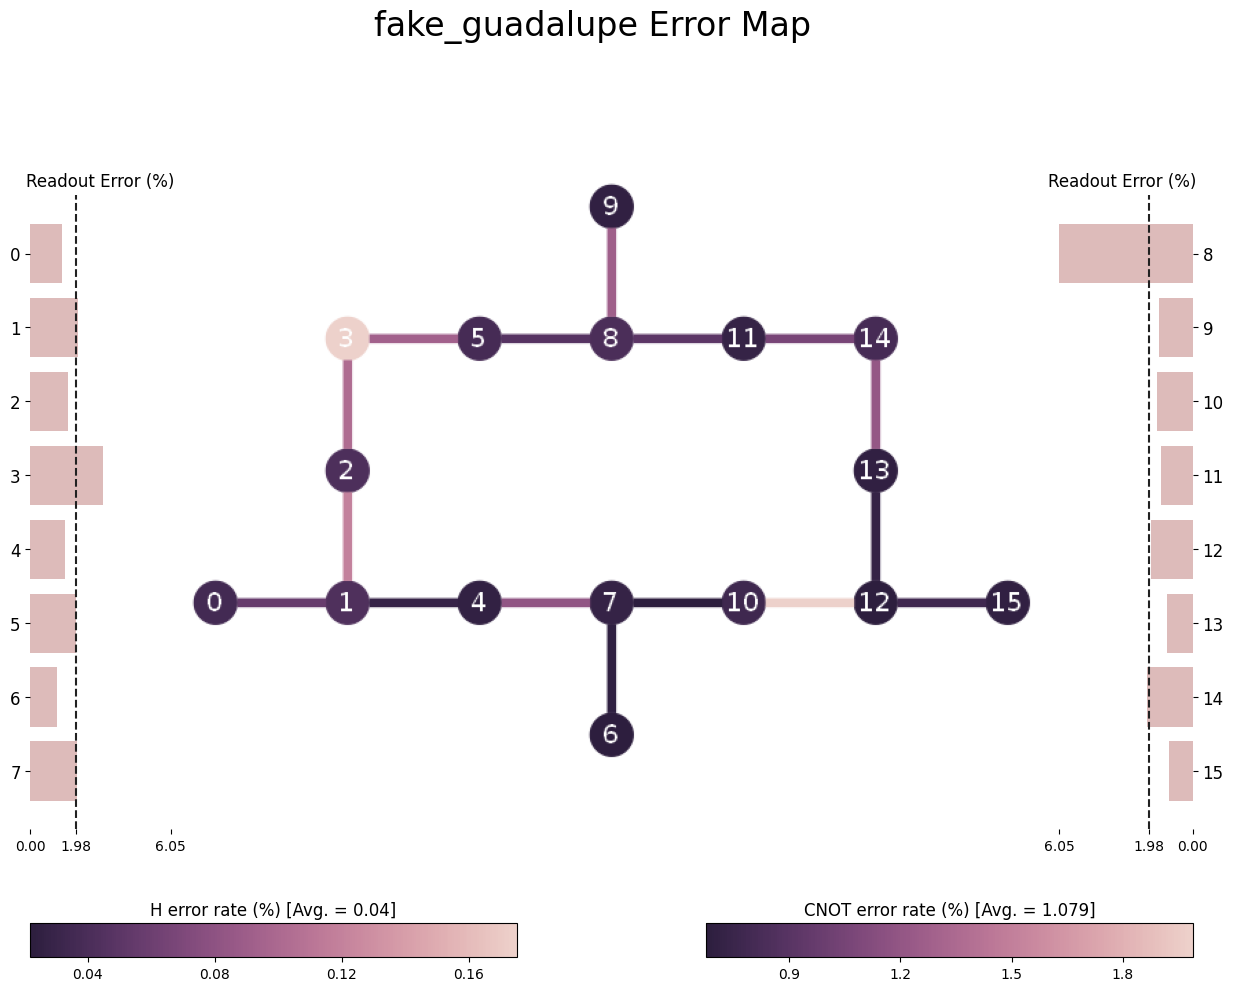

In [14]:
from qiskit.visualization import plot_error_map
plot_error_map(device_simulation)

In [15]:
qc2 = transpile(qc, device_simulation)

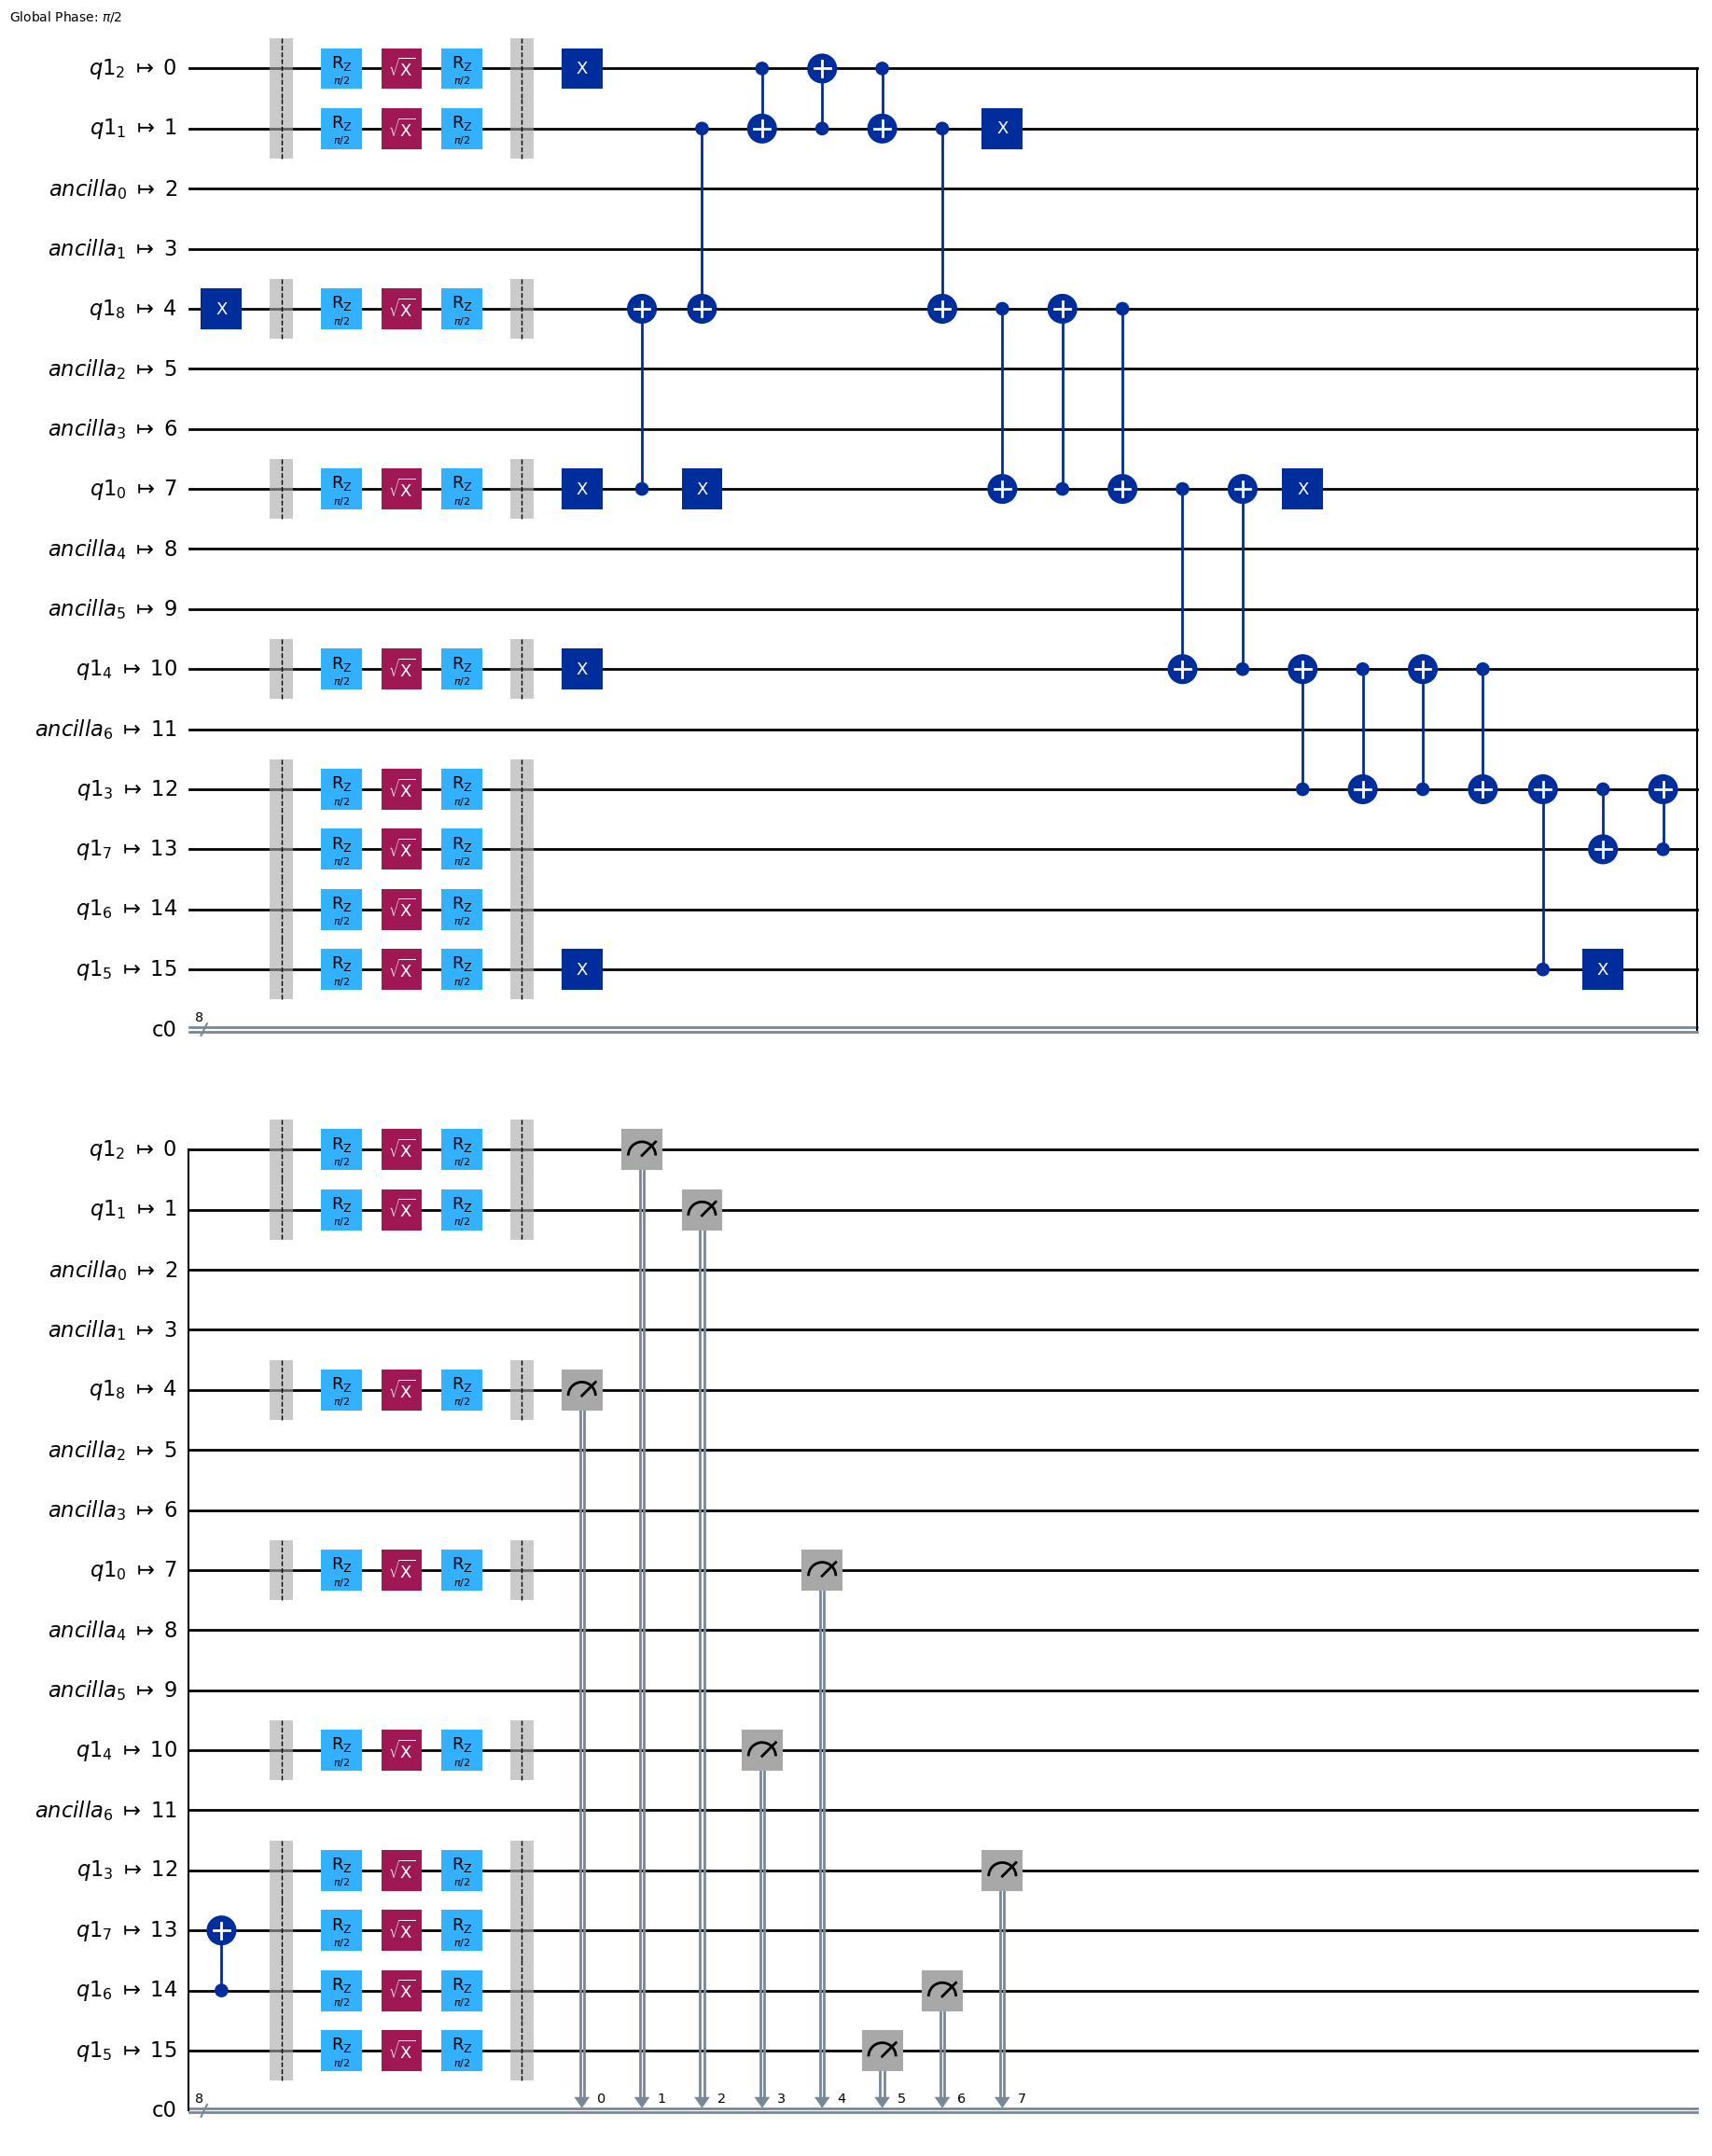

In [16]:
qc2.draw('mpl')

{'11111100': 4, '00011111': 130, '00010011': 7, '01101111': 10, '11110110': 8, '11111111': 3944, '11111110': 178, '11110111': 218, '00010111': 124, '01111110': 7, '00000110': 30, '11100011': 2, '11111011': 187, '11111101': 126, '00000000': 13, '11011111': 108, '11101111': 148, '10111111': 199, '10011011': 2, '11011110': 4, '00000011': 23, '11000001': 1, '00001111': 7, '11011011': 5, '00000100': 3, '00000101': 2, '01111111': 153, '00011101': 5, '11111010': 7, '10101111': 7, '10000110': 2, '11111000': 2, '10001111': 1, '10111101': 6, '11101011': 10, '10111011': 8, '01010111': 4, '01110110': 2, '00111011': 3, '01111101': 10, '01000001': 1, '10011111': 4, '00000111': 66, '00011110': 4, '00000010': 3, '11011101': 1, '00111111': 21, '11010111': 4, '11000110': 1, '11101101': 6, '11111001': 38, '00011011': 5, '01110111': 7, '11001111': 4, '01000111': 2, '01111011': 9, '00000001': 24, '11110101': 6, '11101110': 6, '10110111': 7, '00010110': 5, '11110011': 10, '10110011': 1, '01011111': 10, '111

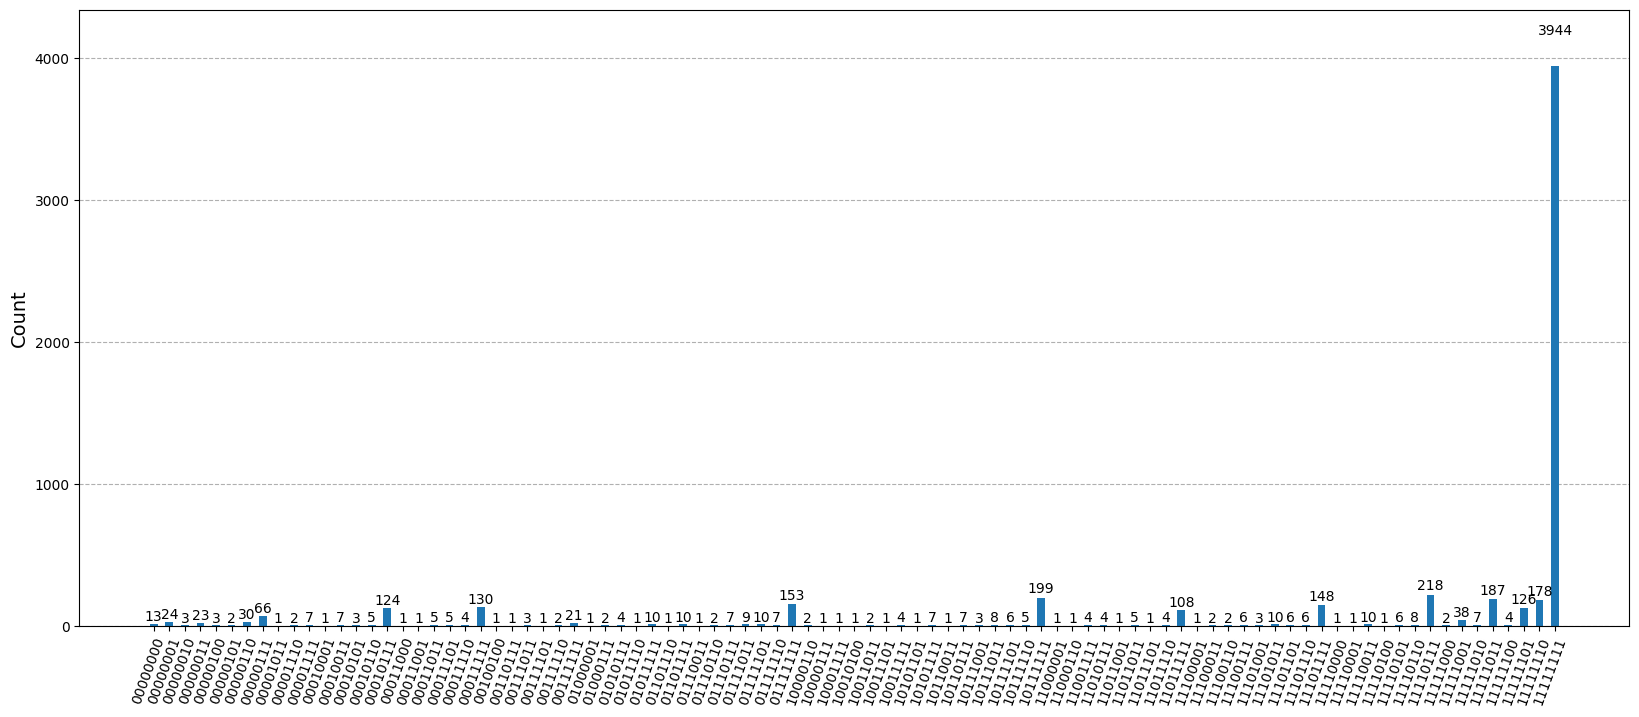

In [17]:
job = device_simulation.run(qc2,shots = 6000)
result = job.result()
counts = result.get_counts()
print(counts)
from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(20,8))